<a href="https://colab.research.google.com/github/SkittyWitty/OceanTrashDetection/blob/main/ImageManipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
from google.colab.patches import cv2_imshow
from IPython.display import Image

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Constants
Image paths and file directories

In [ ]:
PROJ_FOLDER = '/content/drive/MyDrive/Trash Detection/'
INVERTED_DATASET_PATH = PROJ_FOLDER + 'datasets_inverted/' #also normalized
CONTRASTED_DATASET_PATH = PROJ_FOLDER + 'datasets_contrasted/' #also normalized
ICONTRASTED_DATASET_PATH = PROJ_FOLDER + 'datasets_inv_contrasted/' #also normalized
NORMALIZED_DATASET_PATH = PROJ_FOLDER + 'datasets_normalized/'
VISUALIZATION_PATH = PROJ_FOLDER + 'visualization_data/'
DATASET_PATH = PROJ_FOLDER + 'datasets_new/'


##Resize Images
Stretching images (only need to be run once)


In [ ]:
image_path = '/content/drive/MyDrive/Trash Detection/datasets_new/'
for folder in os.listdir('drive/MyDrive/Trash Detection/datasets_new/'):
  for file in os.listdir('drive/MyDrive/Trash Detection/datasets_new/'+folder):
    image = cv2.imread('drive/MyDrive/Trash Detection/datasets_new/'+folder+'/'+file)
    resized = cv2.resize(image, (100, 100))
    # cv2.imshow("Resized Image", resized)                                                                    # imshow function does not work in colab!
    cv2.imwrite('drive/MyDrive/Trash Detection/datasets_new/'+folder+'/'+file, resized)


#Normalize Data
##Only needs to be run once

In [ ]:
NORMALIZED_DATASET_PATH = '/content/drive/MyDrive/Trash Detection/datasets_normalized/'
image_path = '/content/drive/MyDrive/Trash Detection/datasets_new/'
for folder in os.listdir('drive/MyDrive/Trash Detection/datasets_new/'):
    try:
      os.makedirs(NORMALIZED_DATASET_PATH+folder)
    except OSError as error:
      continue
for folder in os.listdir('drive/MyDrive/Trash Detection/datasets_new/'):
  print(folder)
  for file in os.listdir('drive/MyDrive/Trash Detection/datasets_new/'+folder):
    image = cv2.imread('drive/MyDrive/Trash Detection/datasets_new/'+folder+'/'+file)
    normalized = cv2.normalize(image, None, alpha = 0, beta = 1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    cv2.imwrite('drive/MyDrive/Trash Detection/datasets_normalized/'+folder+'/'+file,normalized)

### Color Inversion TESTING
Should be RGB - 255
Would work with normalized data, ( eg : 1 - norm_pixel )


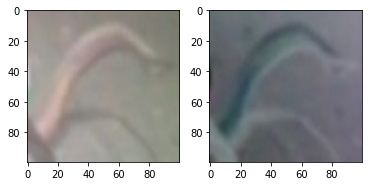

In [ ]:
folder = 'bio/'
for i, file in enumerate(os.listdir(DATASET_PATH+folder)):
  if i == 16:
    image = cv2.imread(DATASET_PATH+folder+'/'+file)
    f, axarr = plt.subplots(1,2)
    axarr[0].imshow(image)
  #  display(Image('drive/MyDrive/Trash Detection/datasets_new/'+folder+'/'+file)) #THIS WORKS!!!! GOT AN IMAGE SHOW

    inverted = 255 - image
    #inverted = 255 - image #idk if thisll work, should tho?
    axarr[1].imshow(inverted)
   # cv2.waitKey(0)
    #cv2.destroyAllWindows()




## IMWRITE TESTING

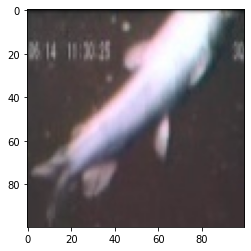

In [ ]:
folder = 'bio/'
for i, file in enumerate(os.listdir(DATASET_PATH+folder)):
  if i == 20:
    image = cv2.imread(DATASET_PATH+folder+'/'+file)
    plt.imshow(image)
    cv2.imwrite('/content/drive/MyDrive/Trash Detection/FISH_IMAGE_TEST.jpg',image)


## Color Contrast TESTING
https://hackernoon.com/image-processing-algorithms-adjusting-contrast-and-image-brightness-0y4y318a

Color contrast is based on specific images (not something that can be easily applied ot each image by one value), takes the min and max value for pixels of image and then normalizes each pixel based on that value.

15
255


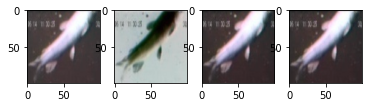

In [ ]:
folder = 'bio/'
for i, file in enumerate(os.listdir(DATASET_PATH+folder)):
  if i == 20:
    image = cv2.imread(DATASET_PATH+folder+'/'+file)
    f, axarr = plt.subplots(1,4)
    axarr[0].imshow(image)
  #  display(Image('drive/MyDrive/Trash Detection/datasets_new/'+folder+'/'+file)) #THIS WORKS!!!! GOT AN IMAGE SHOW

    ## DATA MANIPULATION START
    im_min = np.min(image)
    im_max = np.max(image)
    im_range = im_max-im_min


    print(im_min)
    print(im_max)

    quart_contrasted = (image - im_min)
    half_contrasted = quart_contrasted/im_range #COMPLETE CONTRASTING IT APPEARS --> is automatically normalized, so this is fine
    full_contrasted = 255*half_contrasted #NOT ACTUALLY CONTRASTED, JUST WHITED

    contrasted_float = np.round(full_contrasted)
    contrasted = contrasted_float.astype(int)

    h_half_contrasted = half_contrasted/im_range
    inv_contrasted =  1 - half_contrasted

    inv_reg = 1 - image #WHAT IS HAPPENING HERE????

    #print(half_contrasted)
    #print(f_full_contrasted)


    ## DATA MANIPULATION END



    #inverted = 255 - image #idk if thisll work, should tho?
    axarr[1].imshow(inv_reg)
    axarr[2].imshow(half_contrasted)
    axarr[3].imshow(contrasted)

   # cv2.waitKey(0)
    #cv2.destroyAllWindows()

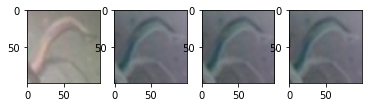

In [ ]:
folder = 'bio/'
for i, file in enumerate(os.listdir(DATASET_PATH+folder)):
  if i == 16:
    image = cv2.imread(DATASET_PATH+folder+'/'+file)
    f, axarr = plt.subplots(1,4)
    axarr[0].imshow(image)
  #  display(Image('drive/MyDrive/Trash Detection/datasets_new/'+folder+'/'+file)) #THIS WORKS!!!! GOT AN IMAGE SHOW

    inv1 = 1 - image
    inv2 = 255 - image #COMPLETE CONTRASTING IT APPEARS
    inv3 = -image #NOT ACTUALLY CONTRASTED, JUST WHITED

    #print(image)
    #print(inv1)


    inv_reg = 1 - image #WHAT IS HAPPENING HERE????



    ## DATA MANIPULATION END



    #inverted = 255 - image #idk if thisll work, should tho?
    axarr[1].imshow(inv1)
    axarr[2].imshow(inv2)
    axarr[3].imshow(inv3)

   # cv2.waitKey(0)
    #cv2.destroyAllWindows()

## INVERSION SCRIPT
Inversion and normalization to new folder

RUN ONCE! (or comment out imwrite)


In [ ]:
PROJ_FOLDER = '/content/drive/MyDrive/Trash Detection/'
INVERTED_DATASET_PATH = PROJ_FOLDER + 'datasets_inverted/' #also normalized
CONTRASTED_DATASET_PATH = PROJ_FOLDER + 'datasets_contrasted/' #also normalized
NORMALIZED_DATASET_PATH = PROJ_FOLDER + 'datasets_normalized/'
VISUALIZATION_PATH = PROJ_FOLDER + 'visualization_data/'
DATASET_PATH = PROJ_FOLDER + 'datasets_new/'

INVERSION_VIS_PATH = VISUALIZATION_PATH+'inverted/'

for folder in os.listdir(DATASET_PATH):
  try:
    os.mkdir(INVERTED_DATASET_PATH+folder)
    os.mkdir(INVERSION_VIS_PATH+folder)
    print("folder: "+folder)
  except OSError:
    print("Did not work: "+folder)
    continue


for folder in os.listdir(DATASET_PATH):
  print(folder)
  for file in os.listdir(DATASET_PATH+folder):
    image = cv2.imread(DATASET_PATH+folder+'/'+file)
    inverted = -image #equiv to 255 - image
    normalized = image/255

    cv2.imwrite(INVERSION_VIS_PATH+folder+'/'+file, inverted)
    cv2.imwrite(INVERTED_DATASET_PATH+folder+'/'+file, normalized) #only commented out so i dont double write


Did not work: plastic
Did not work: paper
Did not work: rubber
Did not work: metal
Did not work: fishing
Did not work: wood
Did not work: cloth
Did not work: bio
Did not work: unknown
Did not work: rov
Did not work: timestamp
plastic
paper
rubber
metal
fishing
wood
cloth
bio
unknown
rov
timestamp


## CONTRASTED SCRIPT

In [ ]:
PROJ_FOLDER = '/content/drive/MyDrive/Trash Detection/'
INVERTED_DATASET_PATH = PROJ_FOLDER + 'datasets_inverted/' #also normalized
CONTRASTED_DATASET_PATH = PROJ_FOLDER + 'datasets_contrasted/' #also normalized
NORMALIZED_DATASET_PATH = PROJ_FOLDER + 'datasets_normalized/'
VISUALIZATION_PATH = PROJ_FOLDER + 'visualization_data/'
DATASET_PATH = PROJ_FOLDER + 'datasets_new/'


try:
  os.mkdir(VISUALIZATION_PATH+'contrasted')
  print("worked")
except OSError:
  print("Did not work")

try:
  os.mkdir(PROJ_FOLDER+'datasets_contrasted')
except:
  print("Did not work")

Did not work


In [ ]:
CONTRASTED_VIS_PATH = VISUALIZATION_PATH + 'contrasted/'

for folder in os.listdir(DATASET_PATH):
  try:
    os.mkdir(CONTRASTED_DATASET_PATH+folder)
    os.mkdir(CONTRASTED_VIS_PATH+folder)
    print("folder: "+folder)
  except OSError:
    print("Did not work: "+folder)
    continue

folder: plastic
folder: paper
folder: rubber
folder: metal
folder: fishing
folder: wood
folder: cloth
folder: bio
folder: unknown
folder: rov
folder: timestamp


plastic
Reg vs contrasted
paper
rubber
metal
fishing
wood
cloth
bio
unknown
rov
timestamp


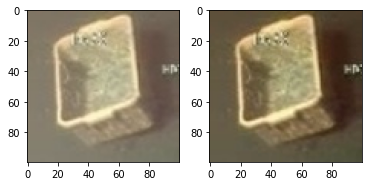

In [ ]:
for folder in os.listdir(DATASET_PATH):
  print(folder)
  for i, file in enumerate(os.listdir(DATASET_PATH+folder)):
    image = cv2.imread(DATASET_PATH+folder+'/'+file)
    im_min = np.min(image)
    im_max = np.max(image)
    im_range = im_max-im_min
    half_contrasted = (image - im_min)
    normalized = half_contrasted/im_range

    contrasted_float = np.round(normalized*255)
    contrasted = contrasted_float.astype(int)


    cv2.imwrite(CONTRASTED_VIS_PATH+folder+'/'+file, contrasted)
    cv2.imwrite(CONTRASTED_DATASET_PATH+folder+'/'+file, normalized) #only commented out so i dont double write

## INVERTED CONTRASTED COMBO SCRIPT
Creating the total folders, then the label folders, then populating with image data

In [ ]:
PROJ_FOLDER = '/content/drive/MyDrive/Trash Detection/'
INVERTED_DATASET_PATH = PROJ_FOLDER + 'datasets_inverted/' #also normalized
CONTRASTED_DATASET_PATH = PROJ_FOLDER + 'datasets_contrasted/' #also normalized
ICONTRASTED_DATASET_PATH = PROJ_FOLDER + 'datasets_inv_contrasted/' #also normalized
NORMALIZED_DATASET_PATH = PROJ_FOLDER + 'datasets_normalized/'
VISUALIZATION_PATH = PROJ_FOLDER + 'visualization_data/'
DATASET_PATH = PROJ_FOLDER + 'datasets_new/'


try:
  os.mkdir(VISUALIZATION_PATH+'inv_contrast')
  print("worked")
except OSError:
  print("Did not work")

try:
  os.mkdir(PROJ_FOLDER+'datasets_inv_contrasted')
except:
  print("Did not work")

Did not work
Did not work


In [ ]:
ICONTRASTED_VIS_PATH = VISUALIZATION_PATH + 'inv_contrast/'

for folder in os.listdir(DATASET_PATH):
  try:
    os.mkdir(ICONTRASTED_VIS_PATH+folder)
    print("folder(vis): "+folder)
  except OSError:
    print("Did not work(vis): "+folder)
  try:
    os.mkdir(ICONTRASTED_DATASET_PATH+folder)
    print("folder(data): "+folder)
  except OSError:
    print("Did not work(data): "+folder)


folder(vis): plastic
folder(data): plastic
Did not work(vis): paper
Did not work(data): paper
Did not work(vis): rubber
Did not work(data): rubber
Did not work(vis): metal
Did not work(data): metal
Did not work(vis): fishing
Did not work(data): fishing
Did not work(vis): wood
Did not work(data): wood
Did not work(vis): cloth
Did not work(data): cloth
Did not work(vis): bio
Did not work(data): bio
Did not work(vis): unknown
Did not work(data): unknown
Did not work(vis): rov
Did not work(data): rov
Did not work(vis): timestamp
Did not work(data): timestamp


In [ ]:
for folder in os.listdir(DATASET_PATH):
  print(folder)
  for i, file in enumerate(os.listdir(DATASET_PATH+folder)):
    image = cv2.imread(DATASET_PATH+folder+'/'+file)
    im_min = np.min(image)
    im_max = np.max(image)
    im_range = im_max-im_min
    half_contrasted = (image - im_min)
    contrasted_normal = half_contrasted/im_range

    contrasted_float = np.round(contrasted_normal*255)
    contrasted = contrasted_float.astype(int)
    icontrasted = 255-contrasted
    normalized = icontrasted/255

    cv2.imwrite(ICONTRASTED_VIS_PATH+folder+'/'+file, icontrasted)
    cv2.imwrite(ICONTRASTED_DATASET_PATH+folder+'/'+file, normalized) #only commented out so i dont double write

plastic
paper
rubber
metal
fishing
wood
cloth
bio
unknown
rov
timestamp


# Image Visualization
Comparing regular with inverted and contrasted and inverted-contrasted

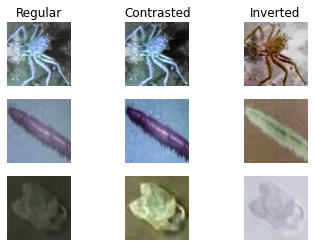

In [ ]:
from operator import invert
PROJ_FOLDER = '/content/drive/MyDrive/Trash Detection/'
VISUALIZATION_PATH = PROJ_FOLDER + 'visualization_data/'
DATASET_PATH = PROJ_FOLDER + 'datasets_new/'


REGULAR_PATH = DATASET_PATH
CONTRASTED_PATH = VISUALIZATION_PATH+'contrasted/'
INVERTED_PATH = VISUALIZATION_PATH+'inverted/'
CNTRST_INV_PATH = VISUALIZATION_PATH+'inv_contrasted/'

folder =  'bio'
for i, file in enumerate(os.listdir(REGULAR_PATH+folder)):
  if i == 14:
    regular = cv2.imread(REGULAR_PATH+folder+'/'+file)
    contrast = cv2.imread(CONTRASTED_PATH+folder+'/'+file)
    inverted = cv2.imread(INVERTED_PATH+folder+'/'+file)

    ax = plt.subplot(3, 3, 1)
    plt.imshow(regular)
    plt.title('Regular')
    plt.axis("off")
    ax = plt.subplot(3, 3, 2)
    plt.imshow(contrast)
    plt.title('Contrasted')
    plt.axis("off")
    ax = plt.subplot(3, 3, 3)
    plt.imshow(inverted)
    plt.title('Inverted')
    plt.axis("off")

  if i == 26:
    regular = cv2.imread(REGULAR_PATH+folder+'/'+file)
    contrast = cv2.imread(CONTRASTED_PATH+folder+'/'+file)
    inverted = cv2.imread(INVERTED_PATH+folder+'/'+file)

    ax = plt.subplot(3, 3, 4)
    plt.imshow(regular)
    plt.axis("off")
    ax = plt.subplot(3, 3, 5)
    plt.imshow(contrast)
    plt.axis("off")
    ax = plt.subplot(3, 3, 6)
    plt.imshow(inverted)
    plt.axis("off")


folder = 'plastic'
for i, file in enumerate(os.listdir(REGULAR_PATH+folder)):
  if i == 100:
    regular = cv2.imread(REGULAR_PATH+folder+'/'+file)
    contrast = cv2.imread(CONTRASTED_PATH+folder+'/'+file)
    inverted = cv2.imread(INVERTED_PATH+folder+'/'+file)

    ax = plt.subplot(3, 3, 7)
    plt.imshow(regular)
    plt.axis("off")
    ax = plt.subplot(3, 3, 8)
    plt.imshow(contrast)
    plt.axis("off")
    ax = plt.subplot(3, 3, 9)
    plt.imshow(inverted)
    plt.axis("off")
